In [1]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, KFold
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import imblearn
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, fbeta_score, plot_confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import make_scorer
from sklearn.svm import SVC
from sklearn import metrics

In [2]:
trainingData = pd.read_csv('Data/TRAIN_ExtractedFeatures&LABEL.csv')
X = trainingData.loc[:, trainingData.columns != 'LABEL']
y = trainingData['LABEL']

In [4]:
#CALCULO DE MEDIA DE LAS METRICAS SOBRE TODAS LAS PARTICIONES CROSS VALIDATION

cv = StratifiedKFold(n_splits=5,shuffle=True, random_state=10)
scoring = {"recall": "recall","precision":"precision", "f4": make_scorer(fbeta_score,beta=4)}

#NORMAL TRAINING
pipeline = make_pipeline(StandardScaler(), SVC(C=1, kernel='poly',class_weight='balanced')) 
#class_weight='balanced' porque si no el desequilbirio impide calcular correctamente las métricas

scores = cross_validate(pipeline, X, y, cv=cv, scoring=scoring)
print('Recall:\n Test:', scores['test_recall'].mean() , '+-', scores['test_recall'].std())
print('Precision:\nTest:', scores['test_precision'].mean(), '+-', scores['test_precision'].std())
print('Puntuación f4:\n Test:', scores['test_f4'].mean(), '+-', scores['test_f4'].std())

Recall:
 Test: 0.5642857142857143 +- 0.17371980724307584
Precision:
Test: 0.3247826086956521 +- 0.11430400879768468
Puntuación f4:
 Test: 0.5362854846138154 +- 0.16499860341543637


In [5]:
#TRAINING WITH SMOTE
model = make_pipeline(StandardScaler(), SVC(C=1, kernel='poly'))
over = SMOTE(sampling_strategy=1,random_state=10)
steps = [('over', over), ('model', model)]
pipeline = Pipeline(steps=steps)

scores = cross_validate(pipeline, X, y, cv=cv, scoring=scoring)
print('Recall:\n Test:', scores['test_recall'].mean() , '+-', scores['test_recall'].std())
print('Precision:\nTest:', scores['test_precision'].mean(), '+-', scores['test_precision'].std())
print('Puntuación f4:\n Test:', scores['test_f4'].mean(), '+-', scores['test_f4'].std())

Recall:
 Test: 0.7785714285714286 +- 0.11984258382544656
Precision:
Test: 0.02541344199362139 +- 0.00927856811097904
Puntuación f4:
 Test: 0.27964543828111843 +- 0.07676953185486558


In [7]:
#TRAINING WITH UNDERSAMPLING + SMOTE USANDO EL VALOR ANTERIOR
model = make_pipeline(StandardScaler(), SVC(C=1, kernel='poly'))
over = SMOTE(sampling_strategy=1,random_state=10)
under = RandomUnderSampler(sampling_strategy=0.01,random_state=10)
steps = [('under', under), ('over', over), ('model', model)]
pipeline = Pipeline(steps=steps)

scores = cross_validate(pipeline, X, y, cv=cv, scoring=scoring)
print('Recall:\n Test:', scores['test_recall'].mean() , '+-', scores['test_recall'].std())
print('Precision:\nTest:', scores['test_precision'].mean(), '+-', scores['test_precision'].std())
print('Puntuación f4:\n Test:', scores['test_f4'].mean(), '+-', scores['test_f4'].std())

Recall:
 Test: 0.7785714285714286 +- 0.11984258382544656
Precision:
Test: 0.020899698299496554 +- 0.0051029155272628406
Puntuación f4:
 Test: 0.2475020579238736 +- 0.05170415207090986


In [11]:
#USE CROSS VALIDATION TO FIND BEST C
model = make_pipeline(StandardScaler(), SVC(C=1, kernel='poly'))
over = SMOTE(sampling_strategy=1,random_state=10)
steps = [('over', over), ('model', model)]
pipeline = Pipeline(steps=steps)
cv = StratifiedKFold(n_splits=5,shuffle=True, random_state=10)
scoring = {"recall": "recall","precision":"precision", "f4": make_scorer(fbeta_score,beta=4)}
grid = GridSearchCV(pipeline, param_grid={'model__svc__C':np.linspace(80,130,5)}, 
                    cv = cv, scoring=scoring,return_train_score=True,refit='f4')

fitted = grid.fit(X,y)

pd.DataFrame(grid.cv_results_)[['mean_test_recall', 'std_test_recall', 'mean_test_precision', 'std_test_precision',
                                'mean_test_f4', 'std_test_f4','params']]

,mean_test_recall,std_test_recall,mean_test_precision,std_test_precision,mean_test_f4,std_test_f4,params
0,0.65,0.09689,0.321041,0.111780,0.602987,0.088869,{'model__svc__C': 80.0}
1,0.65,0.09689,0.330714,0.123007,0.604021,0.089177,{'model__svc__C': 92.5}
2,0.65,0.09689,0.322860,0.120200,0.603410,0.090897,{'model__svc__C': 105.0}
3,0.65,0.09689,0.323636,0.105015,0.605828,0.090385,{'model__svc__C': 117.5}
4,0.65,0.09689,0.325498,0.094465,0.608553,0.090129,{'model__svc__C': 130.0}


In [15]:
#USE CROSS VALIDATION TO FIND BEST C
pipeline = make_pipeline(StandardScaler(), SVC(C=1, kernel='poly',class_weight='balanced')) 
cv = StratifiedKFold(n_splits=5,shuffle=True, random_state=10)
scoring = {"recall": "recall","precision":"precision", "f4": make_scorer(fbeta_score,beta=4)}
grid = GridSearchCV(pipeline, param_grid={'svc__C':np.linspace(4,8,5)}, 
                    cv = cv, scoring=scoring,return_train_score=True,refit='f4')

fitted = grid.fit(X,y)

pd.DataFrame(grid.cv_results_)[['mean_test_recall', 'std_test_recall', 'mean_test_precision', 'std_test_precision',
                                'mean_test_f4', 'std_test_f4','params']]

,mean_test_recall,std_test_recall,mean_test_precision,std_test_precision,mean_test_f4,std_test_f4,params
0,0.617857,0.113838,0.492650,0.099798,0.606751,0.110614,{'svc__C': 4.0}
1,0.667857,0.153862,0.531668,0.138911,0.655035,0.149221,{'svc__C': 5.0}
2,0.667857,0.153862,0.530586,0.176331,0.654296,0.149195,{'svc__C': 6.0}
3,0.667857,0.153862,0.515476,0.188892,0.652719,0.150917,{'svc__C': 7.0}
4,0.667857,0.153862,0.540476,0.253948,0.653247,0.152552,{'svc__C': 8.0}


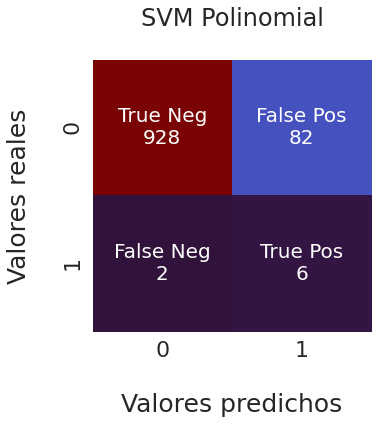

In [21]:
#CONFUSION MATRIX IN TRAINING (en una iteración de la validacion cruzada)

model = make_pipeline(StandardScaler(), SVC(C=5, kernel='poly',class_weight='balanced')) 
over = SMOTE(sampling_strategy=1,random_state=10)
steps = [('over', over), ('model', model)]
clf = Pipeline(steps=steps)
cv = StratifiedKFold(n_splits=5,shuffle=True, random_state=10)

for train_index, test_index in cv.split(X, y):
    X_train, y_train = X.iloc[train_index], y.iloc[train_index]
    clf.fit(X_train,y_train)
    y_test = y.iloc[test_index].array
    y_pred = clf.predict(X.iloc[test_index])
    break
    

matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                matrix.flatten()]

labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]

labels = np.asarray(labels).reshape(2,2)

sns.set(rc={'figure.figsize':(5,5)})
sns.set(font_scale = 2)
ax = sns.heatmap(matrix, annot=labels, fmt='', cmap='turbo',cbar=False, annot_kws={"size": 20})

ax.set_title('SVM Polinomial\n')
ax.set_xlabel('\nValores predichos',fontsize=25)
ax.set_ylabel('Valores reales\n',fontsize=25)
sns.set(font_scale=10)

ax.figure.savefig('CM Training/CM_SVM_poly.png', dpi=1000, bbox_inches="tight")

In [20]:
clf = fitted.best_estimator_
scores = cross_validate(clf, X, y, cv=cv, scoring=scoring)
print('Recall:\n Test:', scores['test_recall'].mean() , '+-', scores['test_recall'].std())
print('Precision:\nTest:', scores['test_precision'].mean(), '+-', scores['test_precision'].std())
print('Puntuación f4:\n Test:', scores['test_f4'].mean(), '+-', scores['test_f4'].std())

Recall:
 Test: 0.6678571428571429 +- 0.15386185163241442
Precision:
Test: 0.5316683316683316 +- 0.13891093624094944
Puntuación f4:
 Test: 0.6550351281202642 +- 0.14922074988729092
